In [36]:
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt

boxes = [
 [2.0, [0.43476563692092896, 0.7194444537162781, 0.03984374925494194, 0.1111111119389534], 0.8438236117362976],
 [2.0, [0.47539061307907104, 0.737500011920929, 0.04296875, 0.11666666716337204], 0.8504939675331116],
 [0.0, [0.33671873807907104, 0.7111111283302307, 0.03593749925494194, 0.09444444626569748], 0.9057255387306213],
 [3.0, [0.2679687440395355, 0.7361111044883728, 0.04374999925494194, 0.125], 0.919158935546875],
 [0.0, [0.21054688096046448, 0.7479166388511658, 0.04921875149011612, 0.12638889253139496], 0.9196999073028564],
 [3.0, [0.38945311307907104, 0.7201389074325562, 0.03984374925494194, 0.10972221940755844], 0.9205850958824158],
 [3.0, [0.5414062738418579, 0.762499988079071, 0.05312500149011612, 0.14444445073604584], 0.9242506623268127],
 [0.0, [0.610156238079071, 0.7909722328186035, 0.06406249850988388, 0.1736111044883728], 0.9282561540603638]
]

image = cv2.imread("/home/maulik/Documents/IITB_Racing/IITB-Racing/Perception/img_cones.webp")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [37]:

h_img,w_img = image.shape[:2]

datalist = []
for i in range(0,8):
    x_centre = boxes[i][1][0]
    y_centre = boxes[i][1][1]
    width = boxes[i][1][2]
    height = boxes[i][1][3]
    x_1 = (x_centre - width/2)*w_img
    y_1 = (y_centre + height/2)*h_img
    x_2 = (x_centre + width/2)*w_img
    y_2 = (y_centre - height/2)*h_img
    color_id = boxes[i][0]

    datalist.append({
        'color_id':color_id,
        'x_1':x_1,
        'y_1':y_1,
        'x_2':x_2,
        'y_2':y_2     
        })

corners = pd.DataFrame(datalist)
corners.head(8)

,color_id,x_1,y_1,x_2,y_2
0,2.0,531.000016,558.000007,582.000015,478.000006
1,2.0,580.999985,573.000009,635.999985,489.000008
2,0.0,407.999985,546.000013,453.999984,478.000012
3,3.0,314.999993,574.999995,370.999992,484.999995
4,0.0,238.000007,583.999981,301.000009,492.999979
5,3.0,472.999985,558.000012,523.999984,479.000014
6,3.0,659.000030,600.999994,727.000031,496.999989
7,0.0,739.999986,632.000005,821.999984,507.000010


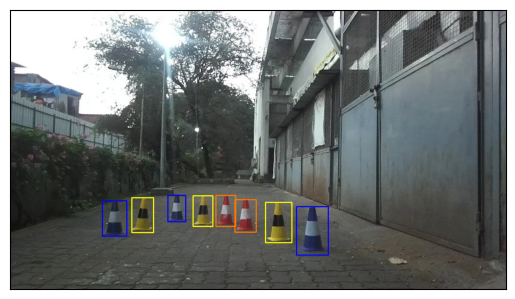

In [38]:

thickness = 2

for index,row in corners.iterrows():
    start_point = (int(row['x_1']),int(row['y_1']))
    end_point = (int(row['x_2']),int(row['y_2']))

    if(row['color_id']==2.0):
         color = (255,120,0) # orange
    
    if(row['color_id']==3.0):
         color = (255,255,0) # yellow
    
    if(row['color_id']==0.0):
         color = (0,0,255) #blue


    cv2.rectangle(image, start_point, end_point, color, thickness)


plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [39]:
focal_length = 1000 #pixels
cone_height = 0.25 #metre


$$ width = \frac{ h_0 \cdot f }{h_i} $$

In [40]:
w =[]
for i in range(0,8):
    h_i = boxes[i][1][3] * h_img
    h_0 = cone_height
    f = focal_length
    width = (h_0 * f)/h_i
    w.append(width)

w = np.array(w)
corners['depth (in m)'] = w

corners.head(8)

,color_id,x_1,y_1,x_2,y_2,depth (in m)
0,2.0,531.000016,558.000007,582.000015,478.000006,3.125000
1,2.0,580.999985,573.000009,635.999985,489.000008,2.976190
2,0.0,407.999985,546.000013,453.999984,478.000012,3.676471
3,3.0,314.999993,574.999995,370.999992,484.999995,2.777778
4,0.0,238.000007,583.999981,301.000009,492.999979,2.747253
5,3.0,472.999985,558.000012,523.999984,479.000014,3.164557
6,3.0,659.000030,600.999994,727.000031,496.999989,2.403846
7,0.0,739.999986,632.000005,821.999984,507.000010,2.000000
